In [115]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv('netflix_titles.csv')

In [5]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
data.shape

(8807, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [15]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [20]:
data.duplicated('title').any()

False

In [272]:
data.groupby('type').count()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
type,,,,,,,,,,,
Movie,6131,6131,5943,5656,5691,6131,6131,6129,6128,6131,6131
TV Show,2676,2676,230,2326,2285,2666,2676,2674,2676,2676,2676


In [144]:
#Species Distribution Analysis
count_category = data['listed_in'].str.split(',').explode().to_frame().groupby('listed_in').value_counts().sort_values(ascending=False).reset_index()

In [147]:
count_category.head()

,listed_in,count
0,International Movies,2624
1,Dramas,1600
2,Comedies,1210
3,Action & Adventure,859
4,Documentaries,829


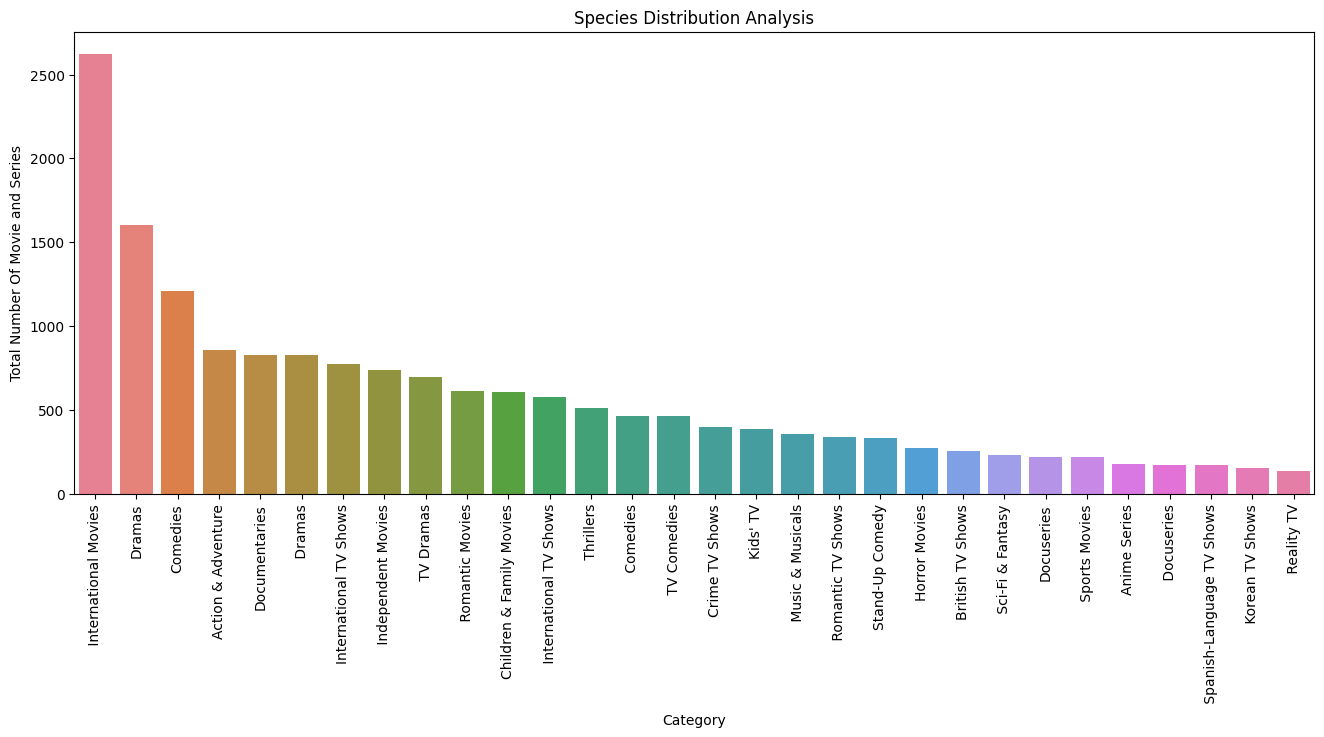

In [165]:
plt.figure(figsize=(16,6))
sns.barplot(count_category,
            x=count_category['listed_in'].head(30),
            y=count_category['count'].head(30),
            hue=count_category['listed_in'].head(30))

plt.xticks(rotation=90)
plt.title('Species Distribution Analysis')
plt.xlabel('Category')
plt.ylabel('Total Number Of Movie and Series')
plt.show()

In [269]:
#content number analysis by country
count_country = data['country'].str.replace(' ','').str.split(',').explode().to_frame().groupby('country').value_counts().reset_index().sort_values('count',ascending=False)

In [270]:
count_country.head(20)

,country,count
116,UnitedStates,3690
46,India,1046
115,UnitedKingdom,806
21,Canada,445
37,France,393
54,Japan,318
103,Spain,232
101,SouthKorea,231
39,Germany,226
68,Mexico,169


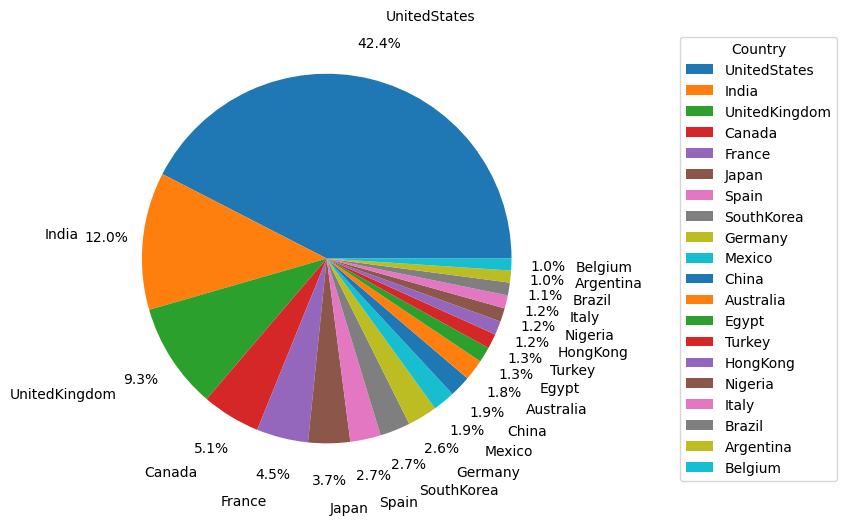

In [271]:
plt.figure(figsize=(12,6))
plt.pie(x=count_country['count'].head(20),labels=count_country['country'].head(20),autopct='%1.1f%%',
        labeldistance=1.35,
        pctdistance=1.2)
plt.legend(title="Country",loc='center left',bbox_to_anchor=(1.25, 0, 0.5, 1),)
plt.show()